In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/my_data.csv")

C:\Users\Imran\AppData\Local\Temp\ipykernel_11280\2144557827.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/my_data.csv")


In [5]:
df_encoded = df

In [7]:
#convert columns to datetime
df_encoded['earliest_cr_line'] = pd.to_datetime(df_encoded['earliest_cr_line'], 
                                                format='%Y-%m-%d', errors='coerce')
df_encoded['issue_d'] = pd.to_datetime(df_encoded['issue_d'], 
                                                format='%Y-%m-%d', errors='coerce')
df_encoded['last_credit_pull_d'] = pd.to_datetime(df_encoded['last_credit_pull_d'], 
                                                format='%Y-%m-%d', errors='coerce')

In [9]:
#dropping since columns will all have na values
df_encoded = df_encoded.drop(['next_pymnt_d'], axis=1, errors='ignore')
df_encoded = df_encoded.drop(['last_pymnt_d'], axis=1, errors='ignore')


In [11]:
df_encoded['days_between'] = (df_encoded['last_credit_pull_d'] - df_encoded['issue_d']).dt.days
df_encoded['days_between'] = df_encoded['days_between'].abs()

In [13]:
df_encoded = df_encoded.drop(['issue_d'], axis=1, errors='ignore')
df_encoded = df_encoded.drop(['last_credit_pull_d'], axis=1, errors='ignore')

In [15]:
df_encoded['earliest_cr_line'] = df_encoded['earliest_cr_line'].dt.year

In [17]:
df_encoded

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,dti_joint,earliest_cr_line,...,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,fraction_recovered,days_between
0,0.0,34.0,55000.0,0.0,0.0,0.0,0.0,5.91,NaN,2003.0,...,0.0,0.0,0.0,2,0.0,55000.0,5.910,32.0,1.123131,1186.0
1,0.0,29.0,65000.0,0.0,0.0,0.0,1.0,16.06,NaN,1999.0,...,1.0,0.0,0.0,2,0.0,65000.0,16.060,32.0,0.978312,1186.0
2,0.0,65.0,63000.0,71000.0,0.0,0.0,0.0,10.78,13.85,2000.0,...,0.0,0.0,0.0,1,0.0,134000.0,12.315,60.0,0.874664,1186.0
3,0.0,78.0,104433.0,0.0,0.0,0.0,1.0,25.37,NaN,1998.0,...,0.0,0.0,0.0,5,0.0,104433.0,25.370,60.0,0.674951,821.0
4,0.0,76.0,34000.0,0.0,0.0,0.0,0.0,10.20,NaN,1987.0,...,0.0,0.0,0.0,2,0.0,34000.0,10.200,32.0,1.057319,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348054,0.0,41.0,130000.0,0.0,0.0,0.0,0.0,20.59,NaN,2004.0,...,0.0,0.0,0.0,1,0.0,130000.0,20.590,60.0,0.915299,881.0
1348055,0.0,68.0,180792.0,0.0,0.0,0.0,0.0,22.03,NaN,2002.0,...,0.0,0.0,0.0,2,0.0,180792.0,22.030,60.0,0.873584,638.0
1348056,0.0,36.0,157000.0,0.0,0.0,0.0,0.0,10.34,NaN,2011.0,...,0.0,0.0,0.0,2,0.0,157000.0,10.340,60.0,0.082763,791.0
1348057,0.0,75.0,150000.0,0.0,0.0,0.0,0.0,12.25,NaN,1997.0,...,0.0,0.0,0.0,2,0.0,150000.0,12.250,60.0,0.858338,881.0


### Filling in Na values

In [19]:
df_encoded['max_bal_bc'].fillna(0, inplace=True)
df_encoded['tot_cur_bal'].fillna(0, inplace=True)
df_encoded['tot_coll_amt'].fillna(0, inplace=True)
df_encoded['total_bal_il'].fillna(0, inplace=True)

In [21]:
df_encoded['total_cu_tl'] = df_encoded['total_cu_tl'].fillna(df_encoded['total_cu_tl'].median())

In [25]:
df_encoded['never_delinq'] = ~df['mths_since_last_delinq'].isna()
df_encoded['never_major_derog'] = ~df['mths_since_last_major_derog'].isna()
df_encoded['never_record'] = ~df['mths_since_last_record'].isna()
df_encoded['never_rcnt_il'] = ~df['mths_since_rcnt_il'].isna()

In [27]:
df_encoded = df_encoded.drop(['mths_since_last_delinq'], axis=1, errors='ignore')
df_encoded = df_encoded.drop(['mths_since_last_major_derog'], axis=1, errors='ignore')
df_encoded = df_encoded.drop(['mths_since_last_record'], axis=1, errors='ignore')
df_encoded = df_encoded.drop(['mths_since_rcnt_il'], axis=1, errors='ignore')

In [28]:
df_encoded[['open_acc_6m', 'open_il_12m',
            'open_il_24m', 'open_rv_12m', 'open_rv_24m']] = df_encoded[['open_acc_6m', 'open_il_12m',
            'open_il_24m', 'open_rv_12m', 'open_rv_24m']].fillna(df_encoded[['open_acc_6m', 'open_il_12m',
          'open_il_24m', 'open_rv_12m', 'open_rv_24m']].median())

In [29]:
df_encoded[['il_util', 'all_util']] = df_encoded[['il_util', 'all_util']].fillna(df_encoded[['il_util', 'all_util']].mean())

In [33]:
df_encoded[['acc_now_delinq', 'annual_inc',
    'collections_12_mths_ex_med', 'delinq_2yrs', 'earliest_cr_line',
  'emp_length', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_util', 'total_acc', 'total_rev_hi_lim' , 'days_between'
   ]] = df_encoded[['acc_now_delinq', 'annual_inc',
    'collections_12_mths_ex_med', 'delinq_2yrs', 'earliest_cr_line',
  'emp_length', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_util', 'total_acc', 'total_rev_hi_lim' , 'days_between']].fillna(df_encoded[['acc_now_delinq', 'annual_inc',
    'collections_12_mths_ex_med', 'delinq_2yrs', 'earliest_cr_line',
  'emp_length', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_util', 'total_acc', 'total_rev_hi_lim' , 'days_between']].median())

In [35]:
df_encoded['dti'] = df_encoded['dti'].fillna(df_encoded['dti'].mean())

In [37]:
lessefaire = df_encoded

In [39]:
lessefaire["annual_inc_total"] = lessefaire["annual_inc_total"].fillna(
    (lessefaire["annual_inc"] + lessefaire["annual_inc_joint"]))

In [41]:
lessefaire = lessefaire.drop(['dti_joint'], axis=1, errors='ignore')

In [43]:
# Grouping by loan_status and counting the occurrences

lessefaire3 = lessefaire
lessefaire3.groupby("loan_status")["loan_status"].count()

loan_status
Charged Off     269320
Fully Paid     1078739
Name: loan_status, dtype: int64

In [51]:
import matplotlib.ticker as ticker

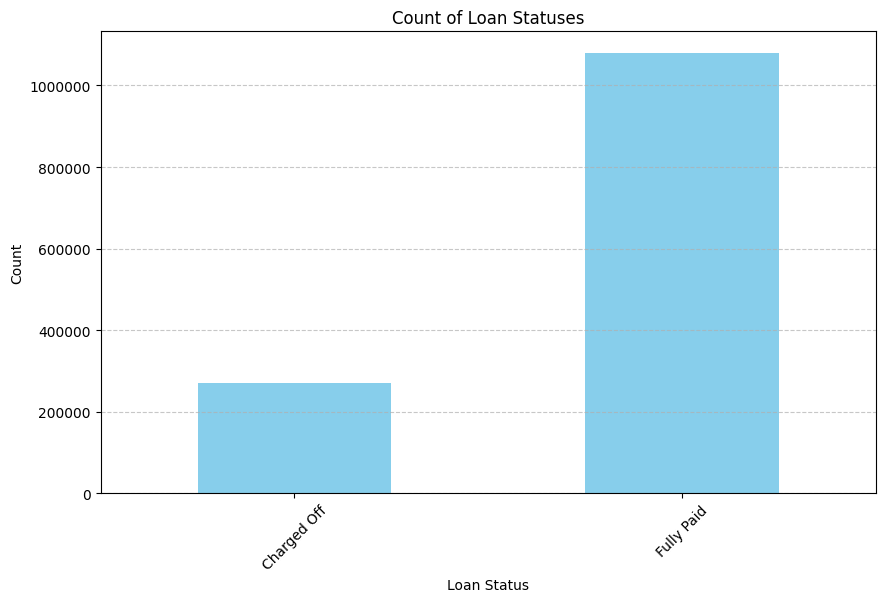

In [61]:
# Grouping by loan_status and counting the occurrences
loan_status_counts = lessefaire3.groupby("loan_status")["loan_status"].count()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = loan_status_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Count of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Setting the y-axis formatter to normal numbers
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


data = lessefaire3

In [65]:
# Separate the classes
fraudulent_data = data[data['loan_status'] == 'Charged Off'] 
valid_data = data[data['loan_status'] == 'Fully Paid']

In [71]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    valid_data.drop('loan_status', axis=1),  # Features (excluding the target class)
    valid_data['loan_status'],  # Target class labels
    test_size=0.2,  
    random_state=42
)


In [73]:
# Undersample the majority class (valid_data)
undersampled_valid_data = resample(
    valid_data,
    replace=False,  # Set to False for undersampling
    n_samples=len(fraudulent_data),  # Match the size of the minority class
    random_state=42
)


In [75]:
balanced_data = pd.concat([fraudulent_data, undersampled_valid_data])

In [77]:
balanced_data

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,...,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,fraction_recovered,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il
10,0.0,55.000000,150000.0,0.0,291.4020,0.0,0.0,9.39,2005.0,7.0,...,0.0,150000.0,9.39,60.0,0.323699,701.0,False,False,True,True
21,0.0,22.000000,35000.0,0.0,66.3066,0.0,2.0,15.22,2011.0,5.0,...,0.0,35000.0,15.22,32.0,0.532927,731.0,True,False,False,True
26,0.0,64.000000,65000.0,0.0,0.0000,0.0,0.0,18.96,1985.0,11.0,...,0.0,65000.0,18.96,32.0,1.010154,1186.0,True,True,True,True
27,0.0,61.000000,75000.0,0.0,0.0000,0.0,0.0,20.84,2007.0,4.0,...,0.0,75000.0,20.84,60.0,0.098059,821.0,False,False,False,True
29,0.0,28.000000,79000.0,0.0,0.0000,0.0,0.0,34.53,2001.0,9.0,...,0.0,79000.0,34.53,60.0,0.415274,1186.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330931,0.0,54.000000,80000.0,0.0,0.0000,0.0,0.0,13.83,2004.0,11.0,...,0.0,80000.0,13.83,32.0,1.059123,457.0,True,False,False,True
167455,0.0,58.176372,68900.0,0.0,0.0000,0.0,0.0,20.55,2002.0,8.0,...,0.0,68900.0,20.55,32.0,1.124644,1096.0,False,False,False,False
215527,0.0,58.176372,95000.0,0.0,0.0000,0.0,1.0,20.49,1992.0,11.0,...,0.0,95000.0,20.49,32.0,1.124110,1369.0,True,False,False,False
102455,0.0,58.176372,105000.0,0.0,0.0000,0.0,0.0,6.06,1999.0,11.0,...,0.0,105000.0,6.06,32.0,1.065801,1247.0,False,False,False,False


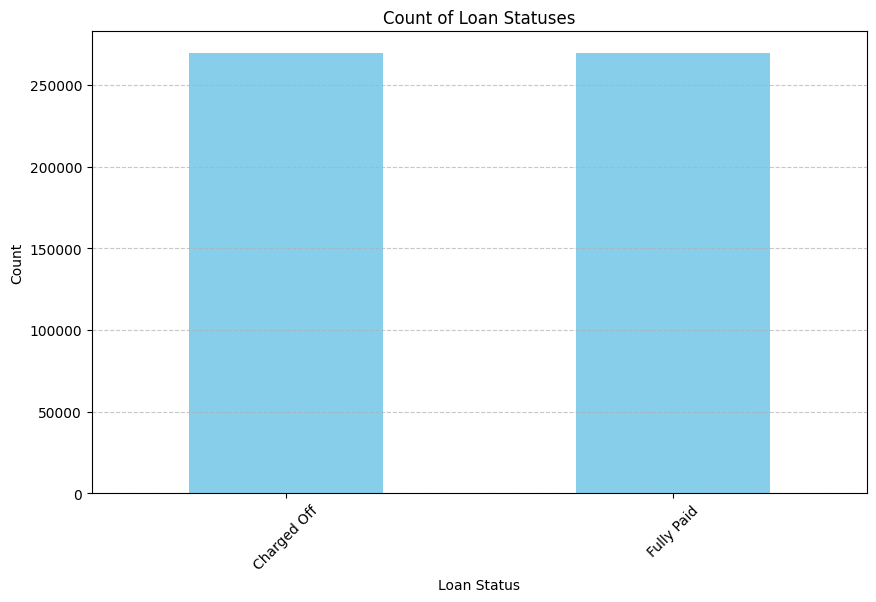

In [79]:
# Grouping by loan_status and counting the occurrences
balance_status_counts = balanced_data.groupby("loan_status")["loan_status"].count()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = balance_status_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Count of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Setting the y-axis formatter to normal numbers
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [62]:
#column may skew model
balanced_data = balanced_data.drop(['fraction_recovered'], axis=1, errors='ignore')

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [72]:
balanced_data['loan_status'].replace('Charged Off', 0, inplace=True)
balanced_data['loan_status'].replace('Fully Paid', 1, inplace=True)

In [74]:
balanced_data

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,loan_status,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il
10,0.0,55.000000,150000.0,0.0,291.4020,0.0,0.0,9.39,2005.0,7.0,669.0,665.0,18000.0,18000.0,71.000000,2.0,2.0,1.0,471.70,19.48,584.0,580.0,471.70,18000.0,0,1271.0,18.0,2.0,1.0,3.0,2.0,4.0,0.0,0.0,1.0,1.0,1618.90,14052.0,40.7,60.0,36247.0,27.0,22195.0,1.0,9452.740000,9452.74,4351.98,0.00,3481.86,34500.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,150000.0,9.39,60.0,701.0,False,False,True,True
21,0.0,22.000000,35000.0,0.0,66.3066,0.0,2.0,15.22,2011.0,5.0,729.0,725.0,4225.0,4225.0,22.000000,0.0,0.0,0.0,146.16,14.85,499.0,0.0,146.16,4225.0,0,367.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,368.37,1058.0,24.6,0.0,4888.0,6.0,3830.0,0.0,2558.870000,2558.87,653.60,0.00,1536.90,4300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,35000.0,15.22,32.0,731.0,True,False,False,True
26,0.0,64.000000,65000.0,0.0,0.0000,0.0,0.0,18.96,1985.0,11.0,679.0,675.0,16000.0,16000.0,68.000000,0.0,0.0,0.0,538.18,12.88,629.0,625.0,565.09,16000.0,0,739.0,7.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.00,5157.0,54.3,1830.0,39781.0,20.0,34624.0,5.0,17396.630000,17396.63,3402.05,161.46,13833.12,9500.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,18.96,32.0,1186.0,True,True,True,True
27,0.0,61.000000,75000.0,0.0,0.0000,0.0,0.0,20.84,2007.0,4.0,664.0,660.0,24250.0,24250.0,75.000000,1.0,3.0,0.0,701.01,24.24,499.0,0.0,701.01,24250.0,0,3138.0,18.0,2.0,0.0,1.0,2.0,10.0,0.0,0.0,1.0,0.0,0.00,24799.0,65.3,0.0,320098.0,21.0,13676.0,1.0,4124.420000,4124.42,2791.73,0.00,1332.69,38000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,75000.0,20.84,60.0,821.0,False,False,False,True
29,0.0,28.000000,79000.0,0.0,0.0000,0.0,0.0,34.53,2001.0,9.0,734.0,730.0,25000.0,25000.0,62.000000,2.0,3.0,1.0,581.58,13.99,604.0,600.0,581.58,25000.0,0,5447.0,33.0,3.0,2.0,4.0,4.0,8.0,0.0,0.0,1.0,0.0,0.00,22519.0,18.6,171.0,265233.0,72.0,67459.0,6.0,14490.920000,14490.92,6126.37,0.00,8364.55,121200.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,79000.0,34.53,60.0,1186.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330931,0.0,54.000000,80000.0,0.0,0.0000,0.0,0.0,13.83,2004.0,11.0,694.0,690.0,5000.0,5000.0,56.000000,0.0,3.0,1.0,164.74,11.44,694.0,690.0,3448.10,5000.0,1,691.0,

In [68]:
X = balanced_data.drop('loan_status', axis=1)
y = balanced_data['loan_status']

In [74]:
X = pd.get_dummies(X)


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)


In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)


In [78]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [79]:
predictions = model.predict(X_cv)


In [104]:
from sklearn.metrics import accuracy_score, classification_report


In [81]:
print(classification_report(y_cv, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80677
           1       1.00      1.00      1.00     80915

    accuracy                           1.00    161592
   macro avg       1.00      1.00      1.00    161592
weighted avg       1.00      1.00      1.00    161592



In [83]:
model.feature_importances_

array([5.80110701e-06, 2.63788138e-05, 5.81868607e-05, 3.11006955e-05,
       1.05086507e-05, 1.25646326e-05, 2.65674617e-05, 1.40070670e-04,
       9.58361722e-05, 4.54446276e-05, 4.80251837e-05, 1.24800393e-04,
       3.14621726e-03, 1.14835976e-04, 5.94231287e-05, 2.90003580e-05,
       3.05995174e-05, 5.75698720e-05, 3.63308086e-04, 1.69351460e-03,
       1.26203015e-03, 1.59446176e-02, 8.96267450e-02, 7.11691982e-04,
       1.67971607e-05, 7.75518936e-05, 4.43242680e-05, 0.00000000e+00,
       3.07625861e-05, 5.30436654e-06, 2.09695621e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.64027586e-05, 1.53603958e-01,
       1.85182782e-04, 1.21422084e-04, 1.16496181e-04, 1.96466213e-04,
       1.50405212e-04, 2.61429494e-05, 1.54308845e-05, 2.00815802e-04,
       1.27019758e-04, 1.88881239e-03, 4.43258142e-04, 4.06569091e-03,
       1.26207546e-04, 0.00000000e+00, 1.69071114e-03, 1.76812218e-05,
       0.00000000e+00, 5.30436654e-06, 0.00000000e+00, 0.00000000e+00,
      

In [156]:
feature_names = list(pred_data.columns)

In [138]:
balanced_data

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,loan_status,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il
10,0.0,55.000000,150000.0,0.0,291.4020,0.0,0.0,9.39,2005.0,7.0,669.0,665.0,71.000000,2.0,2.0,1.0,471.70,19.48,584.0,580.0,471.70,18000.0,0,1271.0,18.0,2.0,1.0,3.0,2.0,4.0,0.0,0.0,1.0,1.0,1618.90,14052.0,40.7,60.0,36247.0,27.0,22195.0,1.0,9452.740000,9452.74,4351.98,0.00,3481.86,34500.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,150000.0,9.39,60.0,701.0,False,False,True,True
21,0.0,22.000000,35000.0,0.0,66.3066,0.0,2.0,15.22,2011.0,5.0,729.0,725.0,22.000000,0.0,0.0,0.0,146.16,14.85,499.0,0.0,146.16,4225.0,0,367.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,368.37,1058.0,24.6,0.0,4888.0,6.0,3830.0,0.0,2558.870000,2558.87,653.60,0.00,1536.90,4300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,35000.0,15.22,32.0,731.0,True,False,False,True
26,0.0,64.000000,65000.0,0.0,0.0000,0.0,0.0,18.96,1985.0,11.0,679.0,675.0,68.000000,0.0,0.0,0.0,538.18,12.88,629.0,625.0,565.09,16000.0,0,739.0,7.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.00,5157.0,54.3,1830.0,39781.0,20.0,34624.0,5.0,17396.630000,17396.63,3402.05,161.46,13833.12,9500.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,18.96,32.0,1186.0,True,True,True,True
27,0.0,61.000000,75000.0,0.0,0.0000,0.0,0.0,20.84,2007.0,4.0,664.0,660.0,75.000000,1.0,3.0,0.0,701.01,24.24,499.0,0.0,701.01,24250.0,0,3138.0,18.0,2.0,0.0,1.0,2.0,10.0,0.0,0.0,1.0,0.0,0.00,24799.0,65.3,0.0,320098.0,21.0,13676.0,1.0,4124.420000,4124.42,2791.73,0.00,1332.69,38000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,75000.0,20.84,60.0,821.0,False,False,False,True
29,0.0,28.000000,79000.0,0.0,0.0000,0.0,0.0,34.53,2001.0,9.0,734.0,730.0,62.000000,2.0,3.0,1.0,581.58,13.99,604.0,600.0,581.58,25000.0,0,5447.0,33.0,3.0,2.0,4.0,4.0,8.0,0.0,0.0,1.0,0.0,0.00,22519.0,18.6,171.0,265233.0,72.0,67459.0,6.0,14490.920000,14490.92,6126.37,0.00,8364.55,121200.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,79000.0,34.53,60.0,1186.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330931,0.0,54.000000,80000.0,0.0,0.0000,0.0,0.0,13.83,2004.0,11.0,694.0,690.0,56.000000,0.0,3.0,1.0,164.74,11.44,694.0,690.0,3448.10,5000.0,1,691.0,6.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.00,3862.0,46.0,0.0,169752.0,9.0,15735.0,0.0,5583.363405,5583.36,583.36,0.00,5000.00,84

In [140]:
goal_data = balanced_data['loan_status']

In [142]:
pred_data = balanced_data.drop('loan_status', axis=1)

10         0
21         0
26         0
27         0
29         0
          ..
1330931    1
167455     1
215527     1
102455     1
127046     1
Name: loan_status, Length: 538640, dtype: int64

In [96]:
scaler_standard = StandardScaler()
data_standard = scaler_standard.fit_transform(pred_data)


In [78]:
data_standard

array([[-0.06727617, -0.28186745,  1.12425506, ..., -0.61120377,
         2.14306212,  1.21229019],
       [-0.06727617, -2.75095796, -0.5778616 , ..., -0.61120377,
        -0.46662203,  1.21229019],
       [-0.06727617,  0.39152087, -0.13383117, ...,  1.63611556,
         2.14306212,  1.21229019],
       ...,
       [-0.06727617, -0.04420834,  0.31019926, ..., -0.61120377,
        -0.46662203, -0.824885  ],
       [-0.06727617, -0.04420834,  0.45820941, ..., -0.61120377,
        -0.46662203, -0.824885  ],
       [-0.06727617, -0.04420834, -0.42985146, ..., -0.61120377,
        -0.46662203, -0.824885  ]])

In [144]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data.drop('loan_status', axis=1),  # Features (excluding the target class)
    goal_data,  # Target class labels
    test_size=0.2,  
    random_state=42
)

In [146]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [147]:
predictions = clf.predict_proba(X_test)

In [148]:
predictions

array([[0.07, 0.93],
       [0.  , 1.  ],
       [1.  , 0.  ],
       ...,
       [0.06, 0.94],
       [0.02, 0.98],
       [1.  , 0.  ]])

In [149]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     53883
           1       0.99      1.00      1.00     53845

    accuracy                           1.00    107728
   macro avg       1.00      1.00      1.00    107728
weighted avg       1.00      1.00      1.00    107728



In [154]:
feature_names

['acc_now_delinq',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'loan_amnt',
 'max_bal_bc',
 'open_acc',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_bal_il',
 'total_cu_tl',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'total_rev_hi_lim',
 'application_type_OrdinalEncoded',
 'term_OrdinalEncoded',
 'initial_list_status_OrdinalEncoded',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_

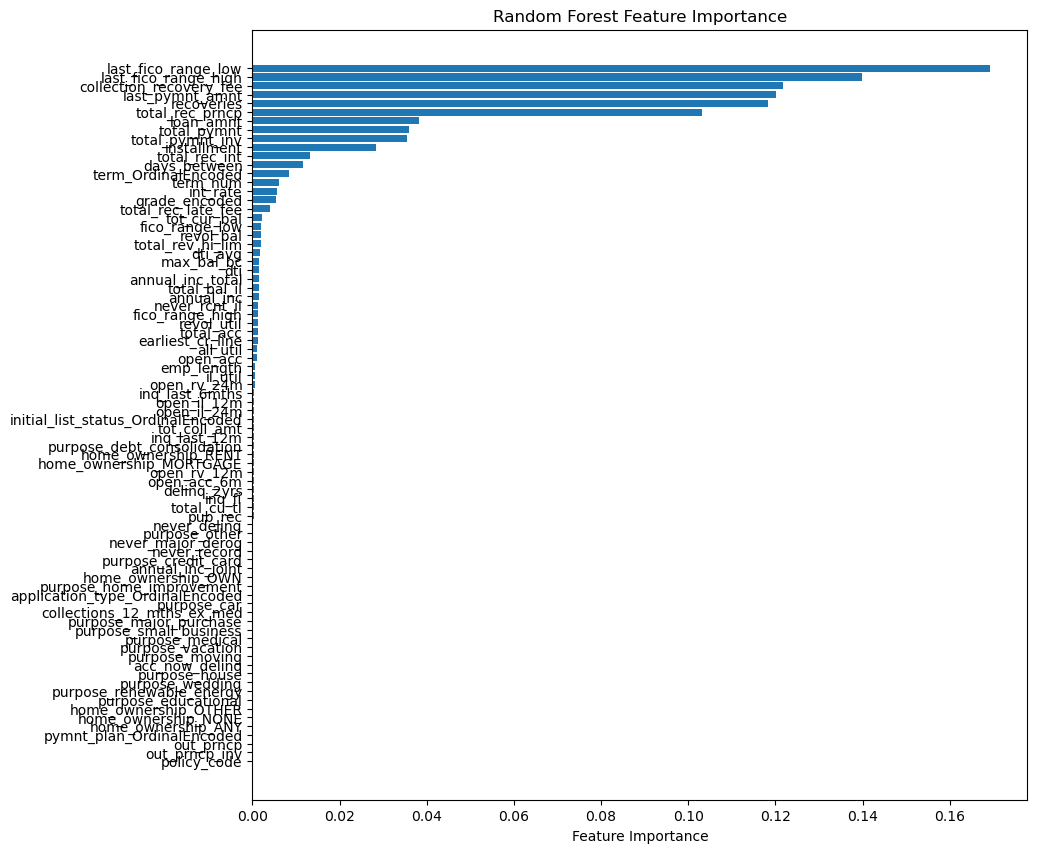

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained Random Forest model (clf)
feature_importance = clf.feature_importances_
feature_names = feature_names # Replace with your actual feature names

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Create a bar chart
plt.figure(figsize=(10, 10))
plt.barh(range(len(feature_names)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [118]:
balanced_data

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,loan_status,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il
10,0.0,55.000000,150000.0,0.0,291.4020,0.0,0.0,9.39,2005.0,7.0,669.0,665.0,71.000000,2.0,2.0,1.0,471.70,19.48,584.0,580.0,471.70,18000.0,0,1271.0,18.0,2.0,1.0,3.0,2.0,4.0,0.0,0.0,1.0,1.0,1618.90,14052.0,40.7,60.0,36247.0,27.0,22195.0,1.0,9452.740000,9452.74,4351.98,0.00,3481.86,34500.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,150000.0,9.39,60.0,701.0,False,False,True,True
21,0.0,22.000000,35000.0,0.0,66.3066,0.0,2.0,15.22,2011.0,5.0,729.0,725.0,22.000000,0.0,0.0,0.0,146.16,14.85,499.0,0.0,146.16,4225.0,0,367.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,368.37,1058.0,24.6,0.0,4888.0,6.0,3830.0,0.0,2558.870000,2558.87,653.60,0.00,1536.90,4300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,35000.0,15.22,32.0,731.0,True,False,False,True
26,0.0,64.000000,65000.0,0.0,0.0000,0.0,0.0,18.96,1985.0,11.0,679.0,675.0,68.000000,0.0,0.0,0.0,538.18,12.88,629.0,625.0,565.09,16000.0,0,739.0,7.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.00,5157.0,54.3,1830.0,39781.0,20.0,34624.0,5.0,17396.630000,17396.63,3402.05,161.46,13833.12,9500.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,18.96,32.0,1186.0,True,True,True,True
27,0.0,61.000000,75000.0,0.0,0.0000,0.0,0.0,20.84,2007.0,4.0,664.0,660.0,75.000000,1.0,3.0,0.0,701.01,24.24,499.0,0.0,701.01,24250.0,0,3138.0,18.0,2.0,0.0,1.0,2.0,10.0,0.0,0.0,1.0,0.0,0.00,24799.0,65.3,0.0,320098.0,21.0,13676.0,1.0,4124.420000,4124.42,2791.73,0.00,1332.69,38000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,75000.0,20.84,60.0,821.0,False,False,False,True
29,0.0,28.000000,79000.0,0.0,0.0000,0.0,0.0,34.53,2001.0,9.0,734.0,730.0,62.000000,2.0,3.0,1.0,581.58,13.99,604.0,600.0,581.58,25000.0,0,5447.0,33.0,3.0,2.0,4.0,4.0,8.0,0.0,0.0,1.0,0.0,0.00,22519.0,18.6,171.0,265233.0,72.0,67459.0,6.0,14490.920000,14490.92,6126.37,0.00,8364.55,121200.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,79000.0,34.53,60.0,1186.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330931,0.0,54.000000,80000.0,0.0,0.0000,0.0,0.0,13.83,2004.0,11.0,694.0,690.0,56.000000,0.0,3.0,1.0,164.74,11.44,694.0,690.0,3448.10,5000.0,1,691.0,6.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.00,3862.0,46.0,0.0,169752.0,9.0,15735.0,0.0,5583.363405,5583.36,583.36,0.00,5000.00,84

In [116]:


# Count rows where column1 equals column2
count_same_values = (balanced_data['funded_amnt'] == balanced_data['loan_amnt']).sum()

print(f"Number of rows with the same value in both columns: {count_same_values}")

Number of rows with the same value in both columns: 537815


In [136]:
balanced_data = balanced_data.drop(['funded_amnt'], axis=1, errors='ignore')
balanced_data = balanced_data.drop(['funded_amnt_inv'], axis=1, errors='ignore')

In [175]:
test_x = balanced_data

In [181]:
test_x

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,loan_status,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il
10,0.0,55.000000,150000.0,0.0,291.4020,0.0,0.0,9.39,2005.0,7.0,669.0,665.0,71.000000,2.0,2.0,1.0,471.70,19.48,584.0,580.0,471.70,18000.0,0,1271.0,18.0,2.0,1.0,3.0,2.0,4.0,0.0,0.0,1.0,1.0,1618.90,14052.0,40.7,60.0,36247.0,27.0,22195.0,1.0,9452.740000,9452.74,4351.98,0.00,3481.86,34500.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,150000.0,9.39,60.0,701.0,False,False,True,True
21,0.0,22.000000,35000.0,0.0,66.3066,0.0,2.0,15.22,2011.0,5.0,729.0,725.0,22.000000,0.0,0.0,0.0,146.16,14.85,499.0,0.0,146.16,4225.0,0,367.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,368.37,1058.0,24.6,0.0,4888.0,6.0,3830.0,0.0,2558.870000,2558.87,653.60,0.00,1536.90,4300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,35000.0,15.22,32.0,731.0,True,False,False,True
26,0.0,64.000000,65000.0,0.0,0.0000,0.0,0.0,18.96,1985.0,11.0,679.0,675.0,68.000000,0.0,0.0,0.0,538.18,12.88,629.0,625.0,565.09,16000.0,0,739.0,7.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.00,5157.0,54.3,1830.0,39781.0,20.0,34624.0,5.0,17396.630000,17396.63,3402.05,161.46,13833.12,9500.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,18.96,32.0,1186.0,True,True,True,True
27,0.0,61.000000,75000.0,0.0,0.0000,0.0,0.0,20.84,2007.0,4.0,664.0,660.0,75.000000,1.0,3.0,0.0,701.01,24.24,499.0,0.0,701.01,24250.0,0,3138.0,18.0,2.0,0.0,1.0,2.0,10.0,0.0,0.0,1.0,0.0,0.00,24799.0,65.3,0.0,320098.0,21.0,13676.0,1.0,4124.420000,4124.42,2791.73,0.00,1332.69,38000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,75000.0,20.84,60.0,821.0,False,False,False,True
29,0.0,28.000000,79000.0,0.0,0.0000,0.0,0.0,34.53,2001.0,9.0,734.0,730.0,62.000000,2.0,3.0,1.0,581.58,13.99,604.0,600.0,581.58,25000.0,0,5447.0,33.0,3.0,2.0,4.0,4.0,8.0,0.0,0.0,1.0,0.0,0.00,22519.0,18.6,171.0,265233.0,72.0,67459.0,6.0,14490.920000,14490.92,6126.37,0.00,8364.55,121200.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,79000.0,34.53,60.0,1186.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330931,0.0,54.000000,80000.0,0.0,0.0000,0.0,0.0,13.83,2004.0,11.0,694.0,690.0,56.000000,0.0,3.0,1.0,164.74,11.44,694.0,690.0,3448.10,5000.0,1,691.0,6.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.00,3862.0,46.0,0.0,169752.0,9.0,15735.0,0.0,5583.363405,5583.36,583.36,0.00,5000.00,84

In [179]:
lessefaire

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,loan_status,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,fraction_recovered,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il
0,0.0,34.0,55000.0,0.0,0.0,0.0,0.0,5.91,2003.0,11.0,679.0,675.0,3600.0,3600.0,36.0,3.0,4.0,1.0,123.03,13.99,564.0,560.0,122.67,3600.0,Fully Paid,722.0,7.0,2.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2765.0,29.7,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.0,3600.00,9300.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,55000.0,5.910,32.0,1.123131,1186.0,True,True,False,True
1,0.0,29.0,65000.0,0.0,0.0,0.0,1.0,16.06,1999.0,11.0,719.0,715.0,24700.0,24700.0,73.0,0.0,6.0,4.0,820.28,11.99,699.0,695.0,926.35,24700.0,Fully Paid,6472.0,22.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,21470.0,19.2,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.0,24700.00,111800.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,16.060,32.0,0.978312,1186.0,True,False,False,True
2,0.0,65.0,63000.0,71000.0,0.0,0.0,0.0,10.78,2000.0,11.0,699.0,695.0,20000.0,20000.0,73.0,2.0,1.0,0.0,432.66,10.78,704.0,700.0,15813.30,20000.0,Fully Paid,2081.0,6.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,7869.0,56.2,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.0,20000.00,14000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,134000.0,12.315,60.0,0.874664,1186.0,False,False,False,True
3,0.0,78.0,104433.0,0.0,0.0,0.0,1.0,25.37,1998.0,3.0,699.0,695.0,10400.0,10400.0,84.0,2.0,3.0,3.0,289.91,22.45,704.0,700.0,10128.96,10400.0,Fully Paid,9702.0,12.0,1.0,0.0,3.0,4.0,7.0,0.0,0.0,1.0,0.0,0.0,21929.0,64.5,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.0,10400.00,34000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,104433.0,25.370,60.0,0.674951,821.0,True,False,False,True
4,0.0,76.0,34000.0,0.0,0.0,0.0,0.0,10.20,1987.0,4.0,694.0,690.0,11950.0,11950.0,99.0,0.0,0.0,0.0,405.18,13.44,759.0,755.0,7653.56,11950.0,Fully Paid,4522.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8822.0,68.4,0.0,12798.0,6.0,3976.0,0.0,13708.948530,13708.95,1758.95,0.0,11950.00,12900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,34000.0,10.200,32.0,1.057319,517.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348054,0.0,41.0,130000.0,0.0,0.0,0.0,0.0,20.59,2004.0,5.0,739.0,735.0,18000.0,18000.0,52.0,1.0,1.0,1.0,377.95,9.4

In [189]:
feature_names2 = list(test_x.columns)

In [197]:
feature_names3

['acc_now_delinq',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'open_acc',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_bal_il',
 'total_cu_tl',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'total_rev_hi_lim',
 'application_type_OrdinalEncoded',
 'term_OrdinalEncoded',
 'initial_list_status_OrdinalEncoded',
 'home_ownership_ANY',
 'home_ownership_MO

In [187]:
feature_names3 = list(lessefaire.columns)

In [199]:
difference = set(feature_names3).difference(set(feature_names2))

In [201]:
print("Difference:", list(difference))

Difference: ['funded_amnt', 'funded_amnt_inv', 'fraction_recovered']


In [205]:
test_x1 = lessefaire

In [207]:
test_x1 = test_x1.drop(['funded_amnt'], axis=1, errors='ignore')
test_x1 = test_x1.drop(['funded_amnt_inv'], axis=1, errors='ignore')
test_x1 = test_x1.drop(['fraction_recovered'], axis=1, errors='ignore')


In [211]:
test_x1 = test_x1.drop(['loan_status'], axis=1, errors='ignore')


In [213]:
# Make predictions
X_new = test_x1
y_new = clf.predict(X_new)

# Add predictions to a DataFrame
df4 = pd.DataFrame(X_new, columns=['feature1', 'feature2'])
df4['predicted_class'] = y_new

In [221]:
proba = clf.predict_proba(X_new)
df4['probability_class_0'] = proba[:, 0]  # Probability of class 0
df4['probability_class_1'] = proba[:, 1]  # Probability of class 1

In [223]:
df4

,feature1,feature2,predicted_class,probability_class_0,probability_class_1
0,NaN,NaN,1,0.19,0.81
1,NaN,NaN,1,0.03,0.97
2,NaN,NaN,1,0.00,1.00
3,NaN,NaN,1,0.00,1.00
4,NaN,NaN,1,0.00,1.00
...,...,...,...,...,...
1348054,NaN,NaN,1,0.00,1.00
1348055,NaN,NaN,1,0.01,0.99
1348056,NaN,NaN,0,1.00,0.00
1348057,NaN,NaN,1,0.00,1.00


In [229]:
lessefaire['loan_status']

0           Fully Paid
1           Fully Paid
2           Fully Paid
3           Fully Paid
4           Fully Paid
              ...     
1348054     Fully Paid
1348055     Fully Paid
1348056    Charged Off
1348057     Fully Paid
1348058    Charged Off
Name: loan_status, Length: 1348059, dtype: object

In [227]:
default_prob = df4['probability_class_0']

In [231]:
test_x1['default_prob'] = default_prob

In [262]:
test_x1

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il,default_prob,expected_loss,rar
0,0.0,34.0,55000.0,0.0,0.0,0.0,0.0,5.91,2003.0,11.0,679.0,675.0,36.0,3.0,4.0,1.0,123.03,13.99,564.0,560.0,122.67,3600.0,722.0,7.0,2.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2765.0,29.7,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.0,3600.00,9300.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,55000.0,5.910,32.0,1186.0,True,True,False,True,0.19,426.5424,3677.0976
1,0.0,29.0,65000.0,0.0,0.0,0.0,1.0,16.06,1999.0,11.0,719.0,715.0,73.0,0.0,6.0,4.0,820.28,11.99,699.0,695.0,926.35,24700.0,6472.0,22.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,21470.0,19.2,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.0,24700.00,111800.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,16.060,32.0,1186.0,True,False,False,True,0.03,462.0876,27199.4424
2,0.0,65.0,63000.0,71000.0,0.0,0.0,0.0,10.78,2000.0,11.0,699.0,695.0,73.0,2.0,1.0,0.0,432.66,10.78,704.0,700.0,15813.30,20000.0,2081.0,6.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,7869.0,56.2,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.0,20000.00,14000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,134000.0,12.315,60.0,1186.0,False,False,False,True,0.00,0.0000,22156.0000
3,0.0,78.0,104433.0,0.0,0.0,0.0,1.0,25.37,1998.0,3.0,699.0,695.0,84.0,2.0,3.0,3.0,289.91,22.45,704.0,700.0,10128.96,10400.0,9702.0,12.0,1.0,0.0,3.0,4.0,7.0,0.0,0.0,1.0,0.0,0.0,21929.0,64.5,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.0,10400.00,34000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,104433.0,25.370,60.0,821.0,True,False,False,True,0.00,0.0000,12734.8000
4,0.0,76.0,34000.0,0.0,0.0,0.0,0.0,10.20,1987.0,4.0,694.0,690.0,99.0,0.0,0.0,0.0,405.18,13.44,759.0,755.0,7653.56,11950.0,4522.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8822.0,68.4,0.0,12798.0,6.0,3976.0,0.0,13708.948530,13708.95,1758.95,0.0,11950.00,12900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,34000.0,10.200,32.0,517.0,False,False,False,True,0.00,0.0000,13556.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348054,0.0,41.0,130000.0,0.0,0.0,0.0,0.0,20.59,2004.0,5.0,739.0,735.0,52.0,1.0,1.0,1.0,377.95,9.49,709.0,705.0,12828.77,18000.0,7061.0,17.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,23833.0,34.0,0.0,168758.0

In [235]:
LGD = 0.6236

In [237]:
EAD = test_x1['loan_amnt']

In [241]:
EAD

0           3600.0
1          24700.0
2          20000.0
3          10400.0
4          11950.0
            ...   
1348054    18000.0
1348055    29400.0
1348056    32000.0
1348057    16000.0
1348058    24000.0
Name: loan_amnt, Length: 1348059, dtype: float64

In [243]:
test_x1['expected_loss'] = test_x1['default_prob']*EAD*LGD

In [251]:
Revenue = EAD*(1+test_x1['int_rate']/100)

In [255]:
rar = Revenue - test_x1['expected_loss']

In [259]:
test_x1['rar'] = rar

In [264]:
final_df = test_x1

In [266]:
final_df

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il,default_prob,expected_loss,rar
0,0.0,34.0,55000.0,0.0,0.0,0.0,0.0,5.91,2003.0,11.0,679.0,675.0,36.0,3.0,4.0,1.0,123.03,13.99,564.0,560.0,122.67,3600.0,722.0,7.0,2.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2765.0,29.7,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.0,3600.00,9300.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,55000.0,5.910,32.0,1186.0,True,True,False,True,0.19,426.5424,3677.0976
1,0.0,29.0,65000.0,0.0,0.0,0.0,1.0,16.06,1999.0,11.0,719.0,715.0,73.0,0.0,6.0,4.0,820.28,11.99,699.0,695.0,926.35,24700.0,6472.0,22.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,21470.0,19.2,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.0,24700.00,111800.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,16.060,32.0,1186.0,True,False,False,True,0.03,462.0876,27199.4424
2,0.0,65.0,63000.0,71000.0,0.0,0.0,0.0,10.78,2000.0,11.0,699.0,695.0,73.0,2.0,1.0,0.0,432.66,10.78,704.0,700.0,15813.30,20000.0,2081.0,6.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,7869.0,56.2,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.0,20000.00,14000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,134000.0,12.315,60.0,1186.0,False,False,False,True,0.00,0.0000,22156.0000
3,0.0,78.0,104433.0,0.0,0.0,0.0,1.0,25.37,1998.0,3.0,699.0,695.0,84.0,2.0,3.0,3.0,289.91,22.45,704.0,700.0,10128.96,10400.0,9702.0,12.0,1.0,0.0,3.0,4.0,7.0,0.0,0.0,1.0,0.0,0.0,21929.0,64.5,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.0,10400.00,34000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,104433.0,25.370,60.0,821.0,True,False,False,True,0.00,0.0000,12734.8000
4,0.0,76.0,34000.0,0.0,0.0,0.0,0.0,10.20,1987.0,4.0,694.0,690.0,99.0,0.0,0.0,0.0,405.18,13.44,759.0,755.0,7653.56,11950.0,4522.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8822.0,68.4,0.0,12798.0,6.0,3976.0,0.0,13708.948530,13708.95,1758.95,0.0,11950.00,12900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,34000.0,10.200,32.0,517.0,False,False,False,True,0.00,0.0000,13556.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348054,0.0,41.0,130000.0,0.0,0.0,0.0,0.0,20.59,2004.0,5.0,739.0,735.0,52.0,1.0,1.0,1.0,377.95,9.49,709.0,705.0,12828.77,18000.0,7061.0,17.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,23833.0,34.0,0.0,168758.0

In [268]:
final_df = final_df.drop(['expected_loss'], axis=1, errors='ignore')
final_df = final_df.drop(['default_prob'], axis=1, errors='ignore')

In [270]:
final_df

,acc_now_delinq,all_util,annual_inc,annual_inc_joint,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,max_bal_bc,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,recoveries,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,application_type_OrdinalEncoded,term_OrdinalEncoded,initial_list_status_OrdinalEncoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_encoded,pymnt_plan_OrdinalEncoded,annual_inc_total,dti_avg,term_num,days_between,never_delinq,never_major_derog,never_record,never_rcnt_il,rar
0,0.0,34.0,55000.0,0.0,0.0,0.0,0.0,5.91,2003.0,11.0,679.0,675.0,36.0,3.0,4.0,1.0,123.03,13.99,564.0,560.0,122.67,3600.0,722.0,7.0,2.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2765.0,29.7,722.0,144904.0,13.0,4981.0,1.0,4421.723917,4421.72,821.72,0.0,3600.00,9300.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,55000.0,5.910,32.0,1186.0,True,True,False,True,3677.0976
1,0.0,29.0,65000.0,0.0,0.0,0.0,1.0,16.06,1999.0,11.0,719.0,715.0,73.0,0.0,6.0,4.0,820.28,11.99,699.0,695.0,926.35,24700.0,6472.0,22.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,21470.0,19.2,0.0,204396.0,38.0,18005.0,0.0,25679.660000,25679.66,979.66,0.0,24700.00,111800.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,65000.0,16.060,32.0,1186.0,True,False,False,True,27199.4424
2,0.0,65.0,63000.0,71000.0,0.0,0.0,0.0,10.78,2000.0,11.0,699.0,695.0,73.0,2.0,1.0,0.0,432.66,10.78,704.0,700.0,15813.30,20000.0,2081.0,6.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,7869.0,56.2,0.0,189699.0,18.0,10827.0,5.0,22705.924294,22705.92,2705.92,0.0,20000.00,14000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,134000.0,12.315,60.0,1186.0,False,False,False,True,22156.0000
3,0.0,78.0,104433.0,0.0,0.0,0.0,1.0,25.37,1998.0,3.0,699.0,695.0,84.0,2.0,3.0,3.0,289.91,22.45,704.0,700.0,10128.96,10400.0,9702.0,12.0,1.0,0.0,3.0,4.0,7.0,0.0,0.0,1.0,0.0,0.0,21929.0,64.5,0.0,331730.0,35.0,73839.0,1.0,11740.500000,11740.50,1340.50,0.0,10400.00,34000.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,104433.0,25.370,60.0,821.0,True,False,False,True,12734.8000
4,0.0,76.0,34000.0,0.0,0.0,0.0,0.0,10.20,1987.0,4.0,694.0,690.0,99.0,0.0,0.0,0.0,405.18,13.44,759.0,755.0,7653.56,11950.0,4522.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8822.0,68.4,0.0,12798.0,6.0,3976.0,0.0,13708.948530,13708.95,1758.95,0.0,11950.00,12900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,34000.0,10.200,32.0,517.0,False,False,False,True,13556.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348054,0.0,41.0,130000.0,0.0,0.0,0.0,0.0,20.59,2004.0,5.0,739.0,735.0,52.0,1.0,1.0,1.0,377.95,9.49,709.0,705.0,12828.77,18000.0,7061.0,17.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,23833.0,34.0,0.0,168758.0,39.0,30516.0,2.0,20756.233632,20756.23,2756.23,0.0,18000.00,70100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.

In [281]:
final_df.to_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/final_df.csv', index = False)